# Realtime Face Mask Detection
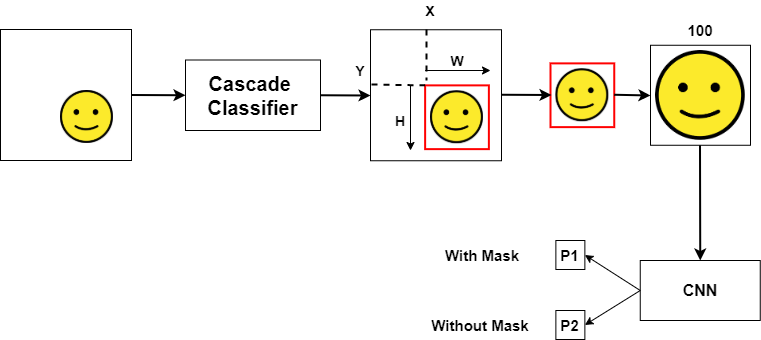

In [66]:
from keras.models import load_model
import cv2
import numpy as np
import tensorflow.keras
from PIL import Image, ImageOps
import pygame

In [67]:
model = tensorflow.keras.models.load_model('keras_model.h5')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

pygame.mixer.pre_init(44100, -16, 2, 2048) # setup mixer to avoid sound lag
pygame.init()
pygame.mixer.init()
pygame.mixer.music.load('beep.mp3')

In [68]:
while(True):

    ret,img=source.read()
    im = Image.fromarray(img,'RGB')
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(img,1.3,5)  

    for (x,y,w,h) in faces:
        size = (224, 224)
        image = ImageOps.fit(im, size, Image.ANTIALIAS)

        data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
        #turn the image into a numpy array
        image_array = np.asarray(image)

        # Normalize the image
        normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

        # Load the image into the array
        data[0] = normalized_image_array
        
        result = model.predict(data)

        label = np.argmax(result)
        if(label == 1):
            pygame.mixer.music.play(0)
  
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
   
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
       
cv2.destroyAllWindows()
source.release()